<a href="https://colab.research.google.com/github/BrunoTohoru/TensorFlow/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução a Regressão com Neural Network no TensorFlow

Existem varias definições para ploblemas de regressão, mas nosso caso, vamos simplifica-lo: predição de uma variável de valor numérico baseado em combinações de outras variáveis, mais resumido... predizendo um número.

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Criando dados para visualizar e adequar

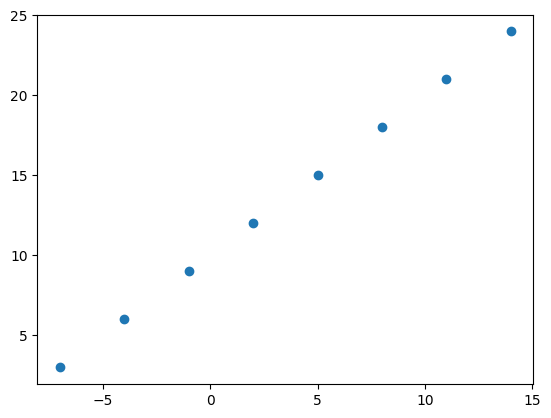

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Criando funções
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Criando rotulos
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualizar
plt.scatter(X, Y)

## Formato dos Inputs e Outputs

In [ ]:
# Criando uma Tensor demo para nosso exemplo da predição do valor da casa
house_info = tf.constant(["bedroom", "bethroom", "garage"])
house_price = tf.constant(939700)
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bethroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=939700>)

In [ ]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
# Transformando os vetores numpy em Tensors
X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

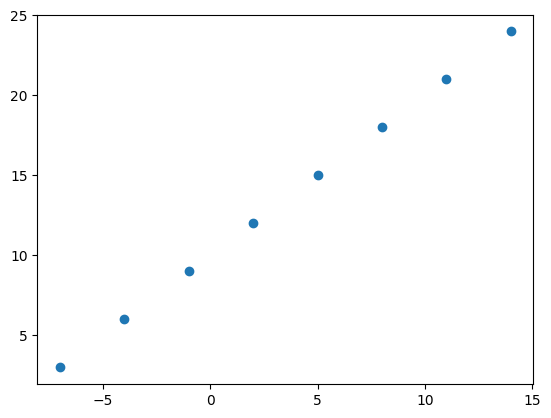

In [ ]:
plt.scatter(X, Y)

## Passos de modelagem em TensorFlow
1. **Creando um modelo** - define as camadas do input e do output, assim como as camadas escondidas (hidden layers) do modelo de deep learning.
2. **Compilando o modelo** - define o loss funtion (em outras palavras, essa função nos diz o quão errado está o nosso modelo) e o optimizer (diz ao nosso modelo como melhorar os padrões de aprendizagem) e avalia as metricas (que podemos usar para interpretar nosso modelo).
3. **Fitting a model** - Deixa nosso modelo achar padrões entre X e Y (features and labbles)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Criando um modelo usando API Sequencial
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Comilar o modelo
model.compile(loss=tf.keras.losses.mae, # mae -> mean absolut error (loss = mean(abs(y_true - y_pred), axis=-1))
              optimizer=tf.keras.optimizers.SGD(), # SGD -> stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 14.3956 - mae: 14.3956
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 14.2631 - mae: 14.2631
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 14.1306 - mae: 14.1306
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 13.9981 - mae: 13.9981
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 13.8656 - mae: 13.8656


In [ ]:
# Verificar X e Y
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Tantando realizar uma predição usando nosso modelo
model.predict([17.0])

1/1 [==============================] - 0s 166ms/step


array([[-1.3252866]], dtype=float32)

## Melhorando nosso modelo

Podemos melhorar nosso modelo alterando os passos que realizamos para cria-lo.
1. **Creating a model** - aqui podemos adicionar mais layers, aumentar o número de hidden units (neuronios) dentro de cada hidden layers, mudando a função de ativação de cada layer.
2. **Compiling a model** - aqui podemos mudar o optimization function, ou talvez o **learning rate** do optimization function.
3. **Fitting a model** - aqui podemos aumentar a quantidade de **epochs** (Deixe o menino treinar mais) ou adicionar mais dados.

In [ ]:
# Vamos reconstruir nosso modelo

# 1. Criando o modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compilando o modelo
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit o modelo (DESTA VEZ COM MAIS TREINO)
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 699ms/step - loss: 13.3447 - mae: 13.3447
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.2122 - mae: 13.2122
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 13.0797 - mae: 13.0797
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 12.9472 - mae: 12.9472
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 12.8147 - mae: 12.8147
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 12.6822 - mae: 12.6822
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 12.5497 - mae: 12.5497
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 12.4172 - mae: 12.4172
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 12.2847 - mae: 12.2847
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 12.1522 - mae: 12.1522
Epoch 11/100
1/1 [==============================

In [ ]:
# Relembrando os dados
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Vamos veririficar o melhoria
model.predict([17.0])

1/1 [==============================] - 0s 91ms/step


array([[29.58704]], dtype=float32)

In [ ]:
from keras.backend import expand_dims
# Adicionando mais hidden layers e neuronios

# 1. Criando o modelo (COM MAIS LAYERS E NEURONIOS)
tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compilando o modelo
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit o modelo
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 6.8494 - mae: 6.8494
Epoch 2/100
1/1 [==============================] - 0s 30ms/step - loss: 6.8438 - mae: 6.8438
Epoch 3/100
1/1 [==============================] - 0s 33ms/step - loss: 6.8381 - mae: 6.8381
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 6.8325 - mae: 6.8325
Epoch 5/100
1/1 [==============================] - 0s 29ms/step - loss: 6.8269 - mae: 6.8269
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 6.8213 - mae: 6.8213
Epoch 7/100
1/1 [==============================] - 0s 30ms/step - loss: 6.8156 - mae: 6.8156
Epoch 8/100
1/1 [==============================] - 0s 27ms/step - loss: 6.8100 - mae: 6.8100
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 6.8044 - mae: 6.8044
Epoch 10/100
1/1 [==============================] - 0s 25ms/step - loss: 6.7988 - mae: 6.7988
Epoch 11/100
1/1 [==============================] - 0s 23ms/step - loss

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 87ms/step


array([[30.337044]], dtype=float32)

In [ ]:
# Modificando nosso optimizador

# Criando o modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compilando o modelo
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

#Fit o modelo
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=200)

Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 13.5877 - mae: 13.5877
Epoch 2/200
1/1 [==============================] - 0s 11ms/step - loss: 13.3192 - mae: 13.3192
Epoch 3/200
1/1 [==============================] - 0s 11ms/step - loss: 13.0540 - mae: 13.0540
Epoch 4/200
1/1 [==============================] - 0s 10ms/step - loss: 12.7905 - mae: 12.7905
Epoch 5/200
1/1 [==============================] - 0s 11ms/step - loss: 12.5351 - mae: 12.5351
Epoch 6/200
1/1 [==============================] - 0s 10ms/step - loss: 12.2860 - mae: 12.2860
Epoch 7/200
1/1 [==============================] - 0s 11ms/step - loss: 12.0482 - mae: 12.0482
Epoch 8/200
1/1 [==============================] - 0s 10ms/step - loss: 11.8040 - mae: 11.8040
Epoch 9/200
1/1 [==============================] - 0s 10ms/step - loss: 11.5495 - mae: 11.5495
Epoch 10/200
1/1 [==============================] - 0s 16ms/step - loss: 11.3421 - mae: 11.3421
Epoch 11/200
1/1 [==============================] -

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 74ms/step


array([[27.085081]], dtype=float32)

## Avaliando o performance do modelo
Na pratica, um fluxo de trabalho típico quando construindo uma rede neural é:
'''
Construindo o modelo -> Fit o modelo -> Avalia o modelo -> Ajusta o modelo -> Fit o modelo -> Ajuste -> Avalia -> Ajusta -> Fit

Quando se trata de avaliar... Existem 3 palavras para se lembrar:

> "Visualização, visualização, visualização"

É uma boa ideia visualizar:
* O dado - Que tipo de dado você está manuzeando? Como ele aparenta?
* O modelo em sí - Como seu modelo se parece?
* O treinamento - Como o modelo performa enquanto aprende?
* As predições do modelo - Como as predições do modelo se alinham com o resultado real?

In [ ]:
# Criando uma dataset maior
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Criando rótulos para o dataset
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

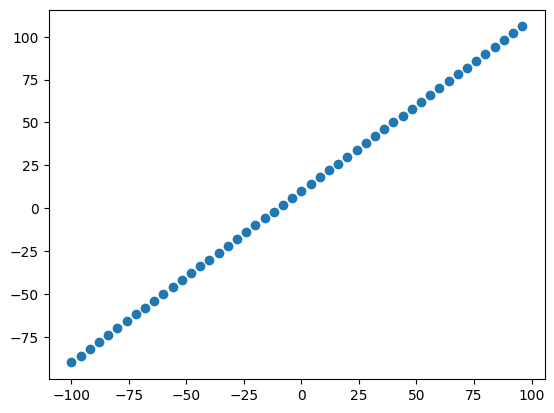

In [ ]:
# Visualizar os dados
import matplotlib.pyplot as plt
plt.scatter(X, Y)

### Os 3 sets...

* **Training set** - o modelo aprende por esses dados, normalmente de 70-80% do total de dados que você vai ter
* **Validation set** - o modelo é ajustado com base nesses dados, noramalmente 10-15% do total de dados que você vai ter
* **Test set** - o modelo é avaliado nesse dado para testar o que foi aprendido, noramalmente 10-15% do total de dados que você vai ter

In [ ]:
#  Checando a quantidade de amostras que temos
len(X)

50

In [ ]:
# Separe os dados em dados de treino e dados de teste
X_train = X[:40] # Os primeiros 40 = 80%
Y_train = Y[:40]

X_test = X[40:] # Os ultimos 10 = 10%
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

### Visualizando os dados
Agora temos nossos dados separados em sets de treino e de teste... vamos visualizar novamente!

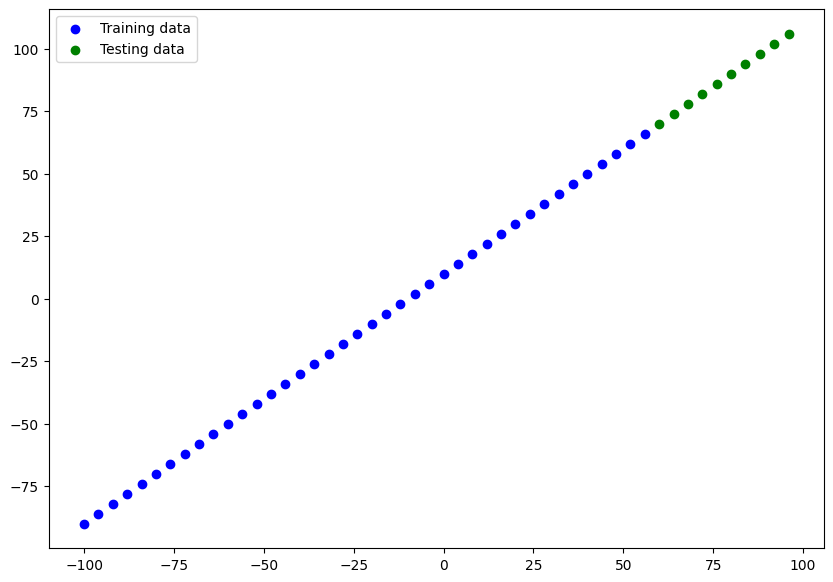

In [ ]:
plt.figure(figsize=(10, 7))
# Plot dados de treino em azul
plt.scatter(X_train, Y_train, c="b", label="Training data") # Nosso modelo deve aprender com esses dados
# Plot dados de teste em verde
plt.scatter(X_test, Y_test, c="g", label="Testing data") # Queremos que nosso modelo seja capaz de predizer os valores de X para Y
# Apresenta uma legenda
plt.legend();

In [ ]:
# Vamos criar nossas rede neural com esses dados

# 1. Criando o modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(100, input_shape=[1], name="hidden_layer1"),
    tf.keras.layers.Dense(100, input_shape=[1], name="hidden_layer2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compilando o modelo
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit o modelo
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 39.9488 - mae: 39.9488
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 14.7652 - mae: 14.7652
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 11.6310 - mae: 11.6310
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 12.3321 - mae: 12.3321
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.0519 - mae: 10.0519
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 8.0399 - mae: 8.0399
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.8727 - mae: 8.8727
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 7.4380 - mae: 7.4380
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 7.6128 - mae: 7.6128
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 7.3794 - mae: 7.3794
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - lo

### Visualizando o modelo

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 hidden_layer1 (Dense)       (None, 100)               10100     
                                                                 
 hidden_layer2 (Dense)       (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


* Total params - total de numeros de parametros no model
* Trainable parameters - esses são os parâmetros (padrões) que o modelo pode melhorar conforme ele treina
* Non-trainabel params - esses parâmetros não são melhorados durante o treino

**Referencia:** para mais informações sobre parâmetros treináveis, olhe o video do MIT de introdução a deep learning. <introtodeeplearning.com>

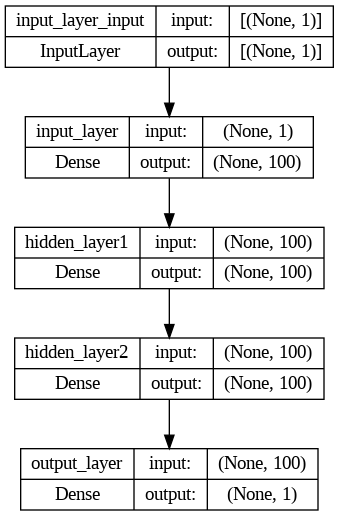

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)


### Visualizando as predições do modelo
Para visualizar as predições, é uma boa ideia plotar eles nos laybel verdadeiros.

Muitas das vezes podemos encntrar eles na forma de 'y_test' ou 'y_true' versus 'y_pred' (ground truth versus your model predictions)

In [ ]:
# Criando predições
Y_pred = model.predict(X_test)
Y_pred

1/1 [==============================] - 0s 59ms/step


array([[ 69.98952 ],
       [ 73.97391 ],
       [ 77.958305],
       [ 81.9427  ],
       [ 85.927086],
       [ 89.91148 ],
       [ 93.89588 ],
       [ 97.88027 ],
       [101.86466 ],
       [105.84905 ]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Vamos criar um plot function
def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=Y_pred):
  """
  Plot de treino de dados, teste de dados e comparações de predições com relação ao ground truth
  """
  plt.figure(figsize=(10, 7))
  # Plot dados de treinamento em azul
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot dados de teste em verde
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot modelos de predição em vermelho
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Apresentar legenda
  plt.legend();

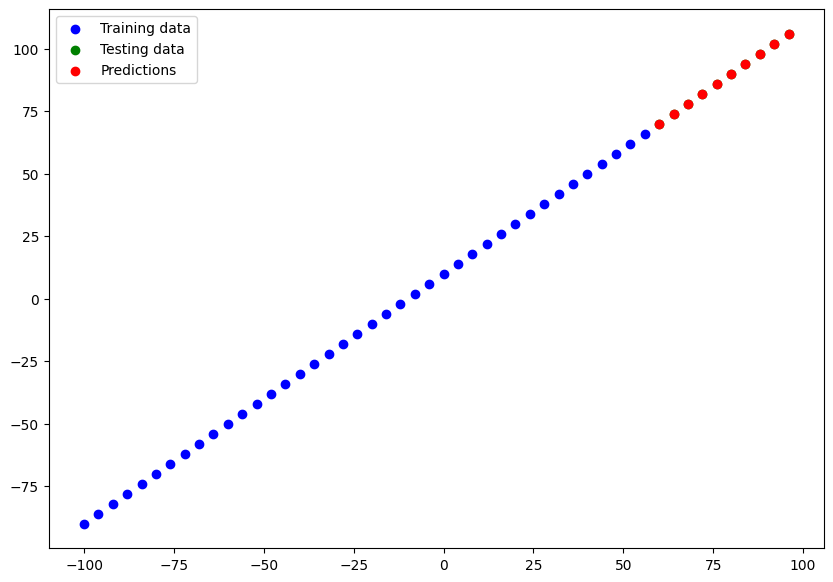

In [ ]:
plot_predictions()

### Avaliando as predições do modelo com metricas de avaliação regressiva

Dependendo do problema que se está avaliando, terá diferentes tipos de métricas de avaliação para seu modelo de performance.

Como estamos trabalhando com regressão, duas das principais métricas são:
* MAE - mean absolute error, "dna média, o quão errado cada uma das predições está"
* MSE - mean square error, "quadrado da média de erros"


In [ ]:
# Avaliando o modelo no teste
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 135ms/step - loss: 0.0807 - mae: 0.0807


[0.08071289211511612, 0.08071289211511612]

In [ ]:
# Calculando o MAE - Mean Absolute Error
mae = tf.keras.losses.mae(Y_test, Y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.010483, 14.820874, 12.425016, 10.822919, 10.014583, 10.      ,
       10.779177, 12.352109, 14.718798, 17.879242], dtype=float32)>

In [ ]:
new_Y_pred = tf.squeeze(Y_pred)

In [ ]:
tf.constant(new_Y_pred), tf.constant(Y_test)

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 69.98952 ,  73.97391 ,  77.958305,  81.9427  ,  85.927086,
         89.91148 ,  93.89588 ,  97.88027 , 101.86466 , 105.84905 ],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
# Calculando novamente o MAE
mae = tf.keras.losses.mae(Y_test, new_Y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.08071289>

In [ ]:
# Calculando o MSE - Mean Square Error
mse = tf.keras.losses.mse(Y_test, new_Y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.008524061>

In [ ]:
# Craindo funções para o uso do MAE e MSE
def mae(Y_true, Y_pred):
  return tf.keras.losses.mae(Y_true=Y_true,
                             Y_pred=tf.squeeze(Y_pred))

def mse(Y_true, Y_pred):
  return tf.keras.losses.mse(Y_true=Y_true,
                             Y_pred=tf.squeeze(Y_pred))

## Realizando experimentos para melhorar nosso modelo
1. Conseguindo mais dados/exemplos
2. Fazer seu modelo maior (deixando-o mais complexo), podendo ser por adição de mais layers ou maais neurônios
3. Treinando por mais tempo (aumentando o epochs)

In [ ]:
# Set random seed
tf.random.set_seed(42)

In [ ]:
# model_1 - 1 layer/epochs = 100
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 109.9361 - mae: 109.9361
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 74.4807 - mae: 74.4807
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 36.9204 - mae: 36.9204
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 7.8370 - mae: 7.8370
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 9.7219 - mae: 9.7219
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0609 - mae: 9.0609
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4737 - mae: 9.4737
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3353 - mae: 9.3353
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 7.5553 - mae: 7.5553
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 12.5897 - mae: 12.5897
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

1/1 [==============================] - 0s 48ms/step


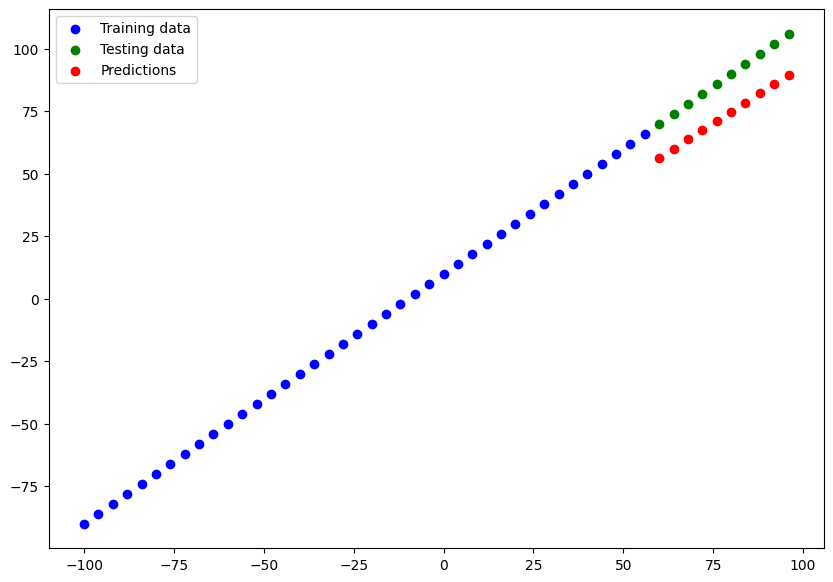

In [ ]:
# fazer um plot de predição para model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
# Calculando modelo de avaliação de predição do model_1
mae_1 = tf.keras.losses.mae(Y_test, tf.squeeze(y_pred_1))
mse_1 = tf.keras.losses.mse(Y_test, tf.squeeze(y_pred_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=15.024493>,
 <tf.Tensor: shape=(), dtype=float32, numpy=226.59265>)

In [ ]:
# model_2 - 2 layres/ epochs=100
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])

model_2.fit(tf.expand_dims(X_test, axis=-1), Y_test, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 552ms/step - loss: 160.7452 - mse: 26332.0371
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 104.5331 - mse: 11211.6299
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 99.1498 - mse: 10003.1318
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 58.4815 - mse: 3471.1082
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 8.6577 - mse: 82.4881
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 83.4672 - mse: 7083.9009
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 73.1681 - mse: 5440.1968
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 41.0134 - mse: 1703.0098
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 60.8290 - mse: 3808.8608
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 80.7729 - mse: 6633.0127
Epoch 11/100
1/1 [========

1/1 [==============================] - 0s 82ms/step


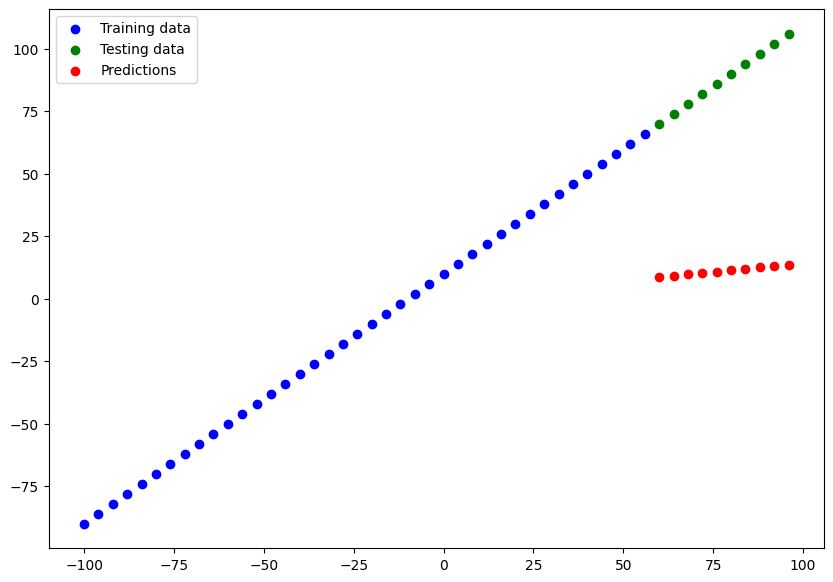

In [ ]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [ ]:
mae_2 = tf.keras.losses.mae(Y_test, tf.squeeze(y_pred_2))
mse_2 = tf.keras.losses.mse(Y_test, tf.squeeze(y_pred_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=76.85777>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6005.372>)

In [ ]:
# model_3 - 2 layers/ epochs=500
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])

model_3.fit(tf.expand_dims(X_test, axis=-1), Y_test, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 847ms/step - loss: 111.8321 - mse: 12731.4102
Epoch 2/500
1/1 [==============================] - 0s 15ms/step - loss: 78.9087 - mse: 6397.9883
Epoch 3/500
1/1 [==============================] - 0s 11ms/step - loss: 91.6528 - mse: 8544.8926
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 62.4091 - mse: 3954.5051
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 5.1263 - mse: 26.7891
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 174.6496 - mse: 31241.8184
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 75.2808 - mse: 5759.7124
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 47.7177 - mse: 2307.8911
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 39.5852 - mse: 1620.2336
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 81.8004 - mse: 6803.2490
Epoch 11/500
1/1 [=========

1/1 [==============================] - 0s 69ms/step


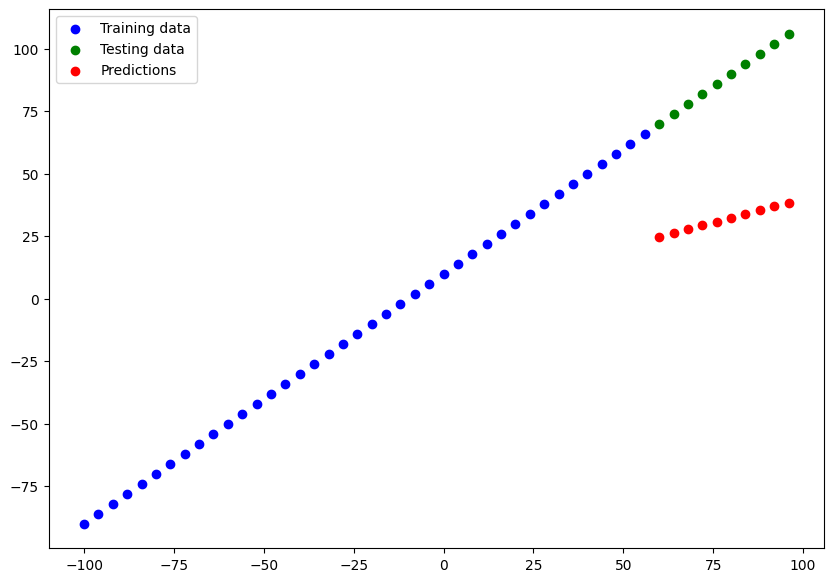

In [ ]:
y_pred_3 = tf.squeeze(model_3.predict(X_test))
plot_predictions(predictions=y_pred_3)

In [ ]:
mae_3 = tf.keras.losses.mae(Y_test, y_pred_3)
mse_3 = tf.keras.losses.mse(Y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=56.34143>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3225.5232>)

### Comparando resultados do experimento

In [ ]:
# Vamos comparar usando pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,15.024493,226.592651
1,model_2,76.857773,6005.372070
2,model_3,56.341431,3225.523193


In [ ]:
# Como o model_1 mostrou melhor adaptação, vamos dar uma olhada
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Acompanhando os experimentos

Um bom habito em modelagem com machine learning é acompanhar os resultados dos experimentos.

**Ferramentas de auxílio:**
* TensorBoard - ajuda a acompanhar os experimentos de modelagem
* Weights & Biases - biblioteca de experimentos de todos os tipos com machine learning

## Salvando os modelos

Salvando nosso modelo podemos usa-los fora do Google Colab, como em uma aplicação web ou mobile

Existem dois formatos de salvamento:
1. The SavedModel format
2. The HDF5 format

In [ ]:
# Salvando usando o SavedModel format
model_1.save("best_model_SavedModel_format")

In [ ]:
# Salvando usando o HDF5 format
model_1.save("best_model_HDF5_format.h5")

## Carregando os modelos salvados


In [ ]:
# Carregando o modelo salvo em SavedModel format
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format") # pode retirar o "/content/" que também compila
loaded_SavedModel_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Comparando o modelo com o modelo salvo
model_1_preds = model_1.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_1_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 61ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Carregando o modelo usando HDF5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Checando se o modelo original bate com o modelo salvo em HDF5
model_1_preds = model_1.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_1_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 57ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download do modelo

Caminho para DOWNLOAD:
1. Ir em "Arquivos"(da barra lateral esquerda) e clique direito no arquivo que deseja e realizar o DOWNLOAD.
2. Usar codigo!
3. Salvando no Google Drive por conectar-lo e copiando lá

In [ ]:
# Download de um arquivo do Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Salvando um arquivo do Google Colab para o Google Drive
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/Colab_Notebooks

In [ ]:
!ls /content/drive/MyDrive/Colab_Notebooks

00_tenserflow_fundamentals.ipynb		  Untitled0.ipynb
01_neural_network_regression_in_tensorflow.ipynb  Untitled1.ipynb
best_model_HDF5_format.h5


## Um exemplo maior

In [ ]:
# Importar a biblioteca requerida
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Lendo o Dataset escolhido
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Vamos tentar One-Hot Encoding nosso DataFrame
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Crie valores de X e Y (da equação linear)
X = insurance_one_hot.drop("charges", axis=1)
Y = insurance_one_hot["charges"]

In [ ]:
# Ver X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# Ver Y
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Crie as amostras de treino e de teste
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Construa uma rede neural
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])

insurance_model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13270.2158 - mse: 320318208.0000
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12369.2061 - mse: 295420224.0000
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12177.5264 - mse: 289027808.0000
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12104.4453 - mse: 287086496.0000
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 11993.3477 - mse: 283667232.0000
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 11813.7061 - mse: 279453632.0000
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 11500.3320 - mse: 271534880.0000
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 11000.1396 - mse: 258673648.0000
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 10386.7773 - mse: 241639936.0000
Epoch 10/100
34/34 [==========================

In [ ]:
# Verificar o resultado do modelo
insurance_model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8982.6787 - mse: 165086768.0000


[8982.6787109375, 165086768.0]

In [ ]:
Y_train.median(), Y_train.mean()

(9575.4421, 13346.089736364485)

In [ ]:
from keras.engine.training import optimizer
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history = insurance_model_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 4ms/step - loss: 13338.9160 - mae: 13338.9160
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13321.1621 - mae: 13321.1621
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 13284.3574 - mae: 13284.3574
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 13213.2881 - mae: 13213.2881
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 13092.3604 - mae: 13092.3604
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 12909.8047 - mae: 12909.8047
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 12672.6846 - mae: 12672.6846
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 12413.9600 - mae: 12413.9600
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 12202.6455 - mae: 12202.6455
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 12112.09

In [ ]:
insurance_model_2.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8632.2236 - mae: 8632.2236


[8632.2236328125, 8632.2236328125]

Text(0.5, 0, 'epochs')

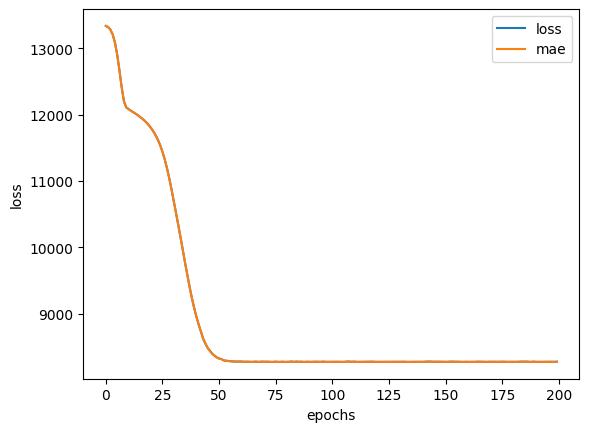

In [ ]:
# Plot o history (conhecido como curva de erros ou curva de treino)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Pré-processando dados (normalização e padronização)

Em termo de valores escalaveis, redes neurais tendem a preferir a NORMALIZAÇÃO de dados. Pois a PADRONIZAÇÃO afeta a influência dos OUTLAYERS.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Ler a base de dados de insurance
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Para preparar nossos dados, nós temos que pegar algumas classes do Scikit-Learn.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Criar uma coluna transformada
ct = make_column_transformer(
    (MinMaxScaler(),["age", "bmi", "children"]), #transformar todos os valores nessas colunas em 0s e 1s
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Criar X e Y
X = insurance.drop("charges", axis=1)
Y = insurance["charges"]

# Construir nossos dados de treino e de teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Vamos FIT (moldar) para nosso dado de treino
ct.fit(X_train)

# Transformar nosso dado de treino e de test como normalização e OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# Como nossos dados se parecem agora?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Lindo! Nossos dados foram normalizados e OneHotENcoded.

Agora vamos construir um modelo de rede neural com eles.

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X_train_normal, axis=-1), Y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 7ms/step - loss: 13345.3193 - mae: 13345.3193
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 13342.5635 - mae: 13342.5635
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 13336.4736 - mae: 13336.4736
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 13324.1367 - mae: 13324.1367
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 13302.2051 - mae: 13302.2051
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 13267.4893 - mae: 13267.4893
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 13217.0996 - mae: 13217.0996
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 13148.2432 - mae: 13148.2432
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 13058.2344 - mae: 13058.2344
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 12944.56

In [ ]:
# Avaliando o modelo
model.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8621.9238 - mae: 8621.9238


[8621.923828125, 8621.923828125]

<Axes: ylabel='Frequency'>

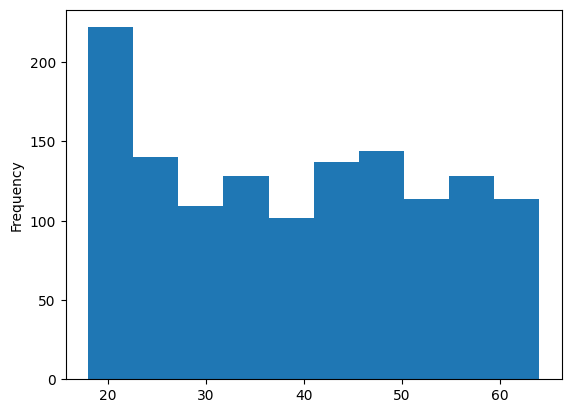

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

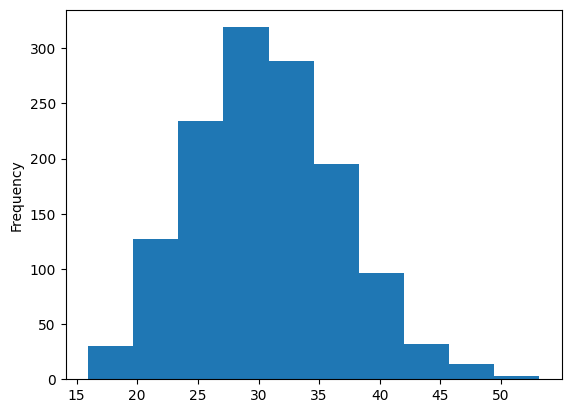

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

# 01. Neural network regression with TensorFlow Exercises
1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?
4. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

model_bh = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_bh.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(lr=0.01),
                 metrics=["mae"])

hist = model_bh.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=200)

57026/57026 [==============================] - 0s 0us/step


Epoch 1/200
13/13 [==============================] - 2s 4ms/step - loss: 25.0899 - mae: 25.0899
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 20.4522 - mae: 20.4523
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 19.3789 - mae: 19.3789
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 19.0897 - mae: 19.0897
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 18.8287 - mae: 18.8287
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 18.5854 - mae: 18.5854
Epoch 7/200
13/13 [==============================] - 0s 4ms/step - loss: 18.3710 - mae: 18.3710
Epoch 8/200
13/13 [==============================] - 0s 5ms/step - loss: 18.1191 - mae: 18.1191
Epoch 9/200
13/13 [==============================] - 0s 4ms/step - loss: 17.9333 - mae: 17.9333
Epoch 10/200
13/13 [==============================] - 0s 4ms/step - loss: 17.6476 - mae: 17.6476
Epoch 11/200
13/13 [===================

In [ ]:
model_bh.evaluate(x_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 6.6829 - mae: 6.6829


[6.682858467102051, 6.682857513427734]

Text(0.5, 0, 'epochs')

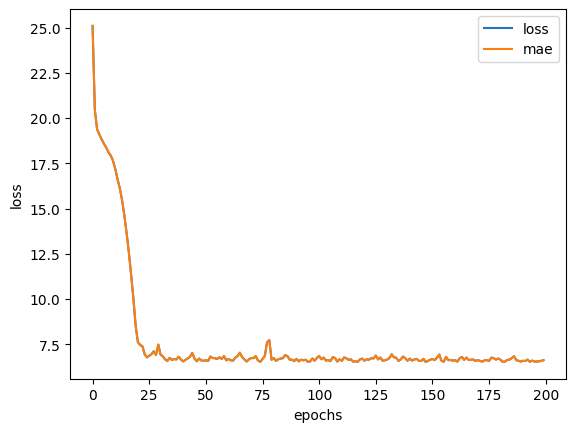

In [ ]:
pd.DataFrame(hist.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")